In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_recall_curve, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier

import time

import warnings
warnings.filterwarnings('ignore')


In [4]:
######## Fake Followers (Complete)
###################################
fake_follwers_tweets = pd.read_csv("data/dataset_complete/fake_followers/tweets.csv", encoding='ISO-8859-1')
fake_follwers_users = pd.read_csv("data/dataset_complete/fake_followers/users.csv")

######## Fake Follower (Tagged) 

In [ ]:
#gnun_acc_tweets = pd.read_csv("data/dataset_complete/genuine/tweets.csv", on_bad_lines='skip', encoding='ISO-8859-1')
gnun_acc_users = pd.read_csv("data/dataset_complete/genuine/users.csv")

spam_polt_tweets = pd.read_csv("data/dataset_complete/spam_political/tweets.csv", encoding='ISO-8859-1')
spam_polt_users = pd.read_csv("data/dataset_complete/spam_political/users.csv", encoding='ISO-8859-1')

spam_paid_app_tweets = pd.read_csv("data/dataset_complete/spam_paid_app/tweets.csv", encoding='ISO-8859-1')
spam_paid_app_users = pd.read_csv("data/dataset_complete/spam_paid_app/users.csv", encoding='ISO-8859-1')

spam_paid_app_tweets = pd.read_csv("data/dataset_complete/spam_paid_app/tweets.csv", encoding='ISO-8859-1')
spam_paid_app_users = pd.read_csv("data/dataset_complete/spam_paid_app/users.csv", encoding='ISO-8859-1')

spam_amzn_prd_sale_tweets = pd.read_csv("data/dataset_complete/spam_amzn_prd_sale/tweets.csv", encoding='ISO-8859-1')
spam_amzn_prd_sale_users = pd.read_csv("data/dataset_complete/spam_amzn_prd_sale/users.csv", encoding='ISO-8859-1')

spam_amzn_prd_sale_tweets = pd.read_csv("data/dataset_complete/spam_amzn_prd_sale/tweets.csv", encoding='ISO-8859-1')
spam_amzn_prd_sale_users = pd.read_csv("data/dataset_complete/spam_amzn_prd_sale/users.csv", encoding='ISO-8859-1')

spam_train_set_tweets = pd.read_csv("data/dataset_complete/spam_train_set/tweets.csv", encoding='ISO-8859-1')
spam_train_set_users = pd.read_csv("data/dataset_complete/spam_train_set/users.csv", encoding='ISO-8859-1')

spam_url_users = pd.read_csv("data/dataset_complete/spam_url/users.csv", encoding='ISO-8859-1')

spam_job_offer_users = pd.read_csv("data/dataset_complete/spam_job_offer/users.csv", encoding='ISO-8859-1')

spam_alter_job_offer_users = pd.read_csv("data/dataset_complete/spam_alter_job_offer/users.csv", encoding='ISO-8859-1')

crowdflower_agg = pd.read_csv("data/dataset_complete/crowdflower/aggregated.csv", encoding='ISO-8859-1')
crowdflower_contri = pd.read_csv("data/dataset_complete/crowdflower/contributors.csv", encoding='ISO-8859-1')
crowdflower_detailed = pd.read_csv("data/dataset_complete/crowdflower/detailed.csv", encoding='ISO-8859-1')

In [5]:
###################################
# E13 (elections 2013): 100% humans
###################################
e13_real_followers = pd.read_csv("data/dataset_tagged/E13/followers.csv", encoding='ISO-8859-1')
e13_real_friends = pd.read_csv("data/dataset_tagged/E13/friends.csv", encoding='ISO-8859-1')
e13_real_tweets = pd.read_csv("data/dataset_tagged/E13/tweets.csv", encoding='ISO-8859-1')
e13_real_users = pd.read_csv("data/dataset_tagged/E13/users.csv", encoding='ISO-8859-1')

###################################
# TFP (the fake project): 100% humans
###################################
tfp_real_followers = pd.read_csv("data/dataset_tagged/TFP/followers.csv", encoding='ISO-8859-1')
tfp_real_friends = pd.read_csv("data/dataset_tagged/TFP/friends.csv", encoding='ISO-8859-1')
tfp_real_tweets = pd.read_csv("data/dataset_tagged/TFP/tweets.csv", encoding='ISO-8859-1')
tfp_real_users = pd.read_csv("data/dataset_tagged/TFP/users.csv", encoding='ISO-8859-1')

###################################
# TWT (twittertechnology): 100% fake followers
###################################

twt_fake_followers = pd.read_csv("data/dataset_tagged/TWT/followers.csv", encoding='ISO-8859-1')
twt_fake_friends = pd.read_csv("data/dataset_tagged/TWT/friends.csv", encoding='ISO-8859-1')
twt_fake_tweets = pd.read_csv("data/dataset_tagged/TWT/tweets.csv", encoding='ISO-8859-1')
twt_fake_users = pd.read_csv("data/dataset_tagged/TWT/users.csv", encoding='ISO-8859-1')

###################################
# FSF (fastfollowerz): 100% fake followers
###################################
fsf_fake_followers = pd.read_csv("data/dataset_tagged/FSF/followers.csv", encoding='ISO-8859-1')
fsf_fake_friends = pd.read_csv("data/dataset_tagged/FSF/friends.csv", encoding='ISO-8859-1')
fsf_fake_tweets = pd.read_csv("data/dataset_tagged/FSF/tweets.csv", encoding='ISO-8859-1')
fsf_fake_users = pd.read_csv("data/dataset_tagged/FSF/users.csv", encoding='ISO-8859-1')

###################################
# INT (intertwitter): 100% fake followers
###################################
int_fake_followers = pd.read_csv("data/dataset_tagged/INT/followers.csv", encoding='ISO-8859-1')
int_fake_friends = pd.read_csv("data/dataset_tagged/INT/friends.csv", encoding='ISO-8859-1')
int_fake_tweets = pd.read_csv("data/dataset_tagged/INT/tweets.csv", encoding='ISO-8859-1', low_memory= False)
int_fake_users = pd.read_csv("data/dataset_tagged/INT/users.csv", encoding='ISO-8859-1')

recordcount = {
  "E13": [e13_real_followers.shape[0], e13_real_friends.shape[0], e13_real_tweets.shape[0], e13_real_users.shape[0], "E13 (elections 2013): '100%' humans"],
  "TFP": [tfp_real_followers.shape[0], tfp_real_friends.shape[0], tfp_real_tweets.shape[0], tfp_real_users.shape[0], "TFP (the fake project): '100%' humans" ],
  "TWT": [twt_fake_followers.shape[0], twt_fake_friends.shape[0], twt_fake_tweets.shape[0], twt_fake_users.shape[0], "TWT (twittertechnology): '100%' fake followers" ],
  "FSF": [fsf_fake_followers.shape[0], fsf_fake_friends.shape[0], fsf_fake_tweets.shape[0], fsf_fake_users.shape[0], "FSF (fastfollowerz): '100%' fake followers" ],
  "INT": [int_fake_followers.shape[0], int_fake_friends.shape[0], int_fake_tweets.shape[0], int_fake_users.shape[0], "INT (intertwitter): '100%' fake followers"]
}

In [6]:
tagged_df=pd.DataFrame(data=recordcount,index=["Followers", "Friends","Tweets","Users", "description"]).transpose()

tagged_df

,Followers,Friends,Tweets,Users,description
E13,1526944,667225,2068037,1481,E13 (elections 2013): '100%' humans
TFP,258494,241710,563693,469,TFP (the fake project): '100%' humans
TWT,28588,729839,114192,845,TWT (twittertechnology): '100%' fake followers
FSF,11893,253026,22910,1169,FSF (fastfollowerz): '100%' fake followers
INT,23173,517485,58925,1337,INT (intertwitter): '100%' fake followers


In [7]:
int_fake_followers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23173 entries, 0 to 23172
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   source_id  23173 non-null  int64
 1   target_id  23173 non-null  int64
dtypes: int64(2)
memory usage: 362.2 KB


In [8]:
int_fake_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58925 entries, 0 to 58924
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   created_at               58925 non-null  object 
 1   id                       58925 non-null  int64  
 2   text                     58918 non-null  object 
 3   source                   58925 non-null  object 
 4   user_id                  58925 non-null  int64  
 5   truncated                0 non-null      float64
 6   in_reply_to_status_id    58925 non-null  int64  
 7   in_reply_to_user_id      58925 non-null  int64  
 8   in_reply_to_screen_name  160 non-null    object 
 9   retweeted_status_id      0 non-null      float64
 10  geo                      0 non-null      float64
 11  place                    0 non-null      float64
 12  retweet_count            58925 non-null  int64  
 13  reply_count              58925 non-null  int64  
 14  favorite_count        

In [9]:
int_fake_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  1337 non-null   int64  
 1   name                                1337 non-null   object 
 2   screen_name                         1337 non-null   object 
 3   statuses_count                      1337 non-null   int64  
 4   followers_count                     1337 non-null   int64  
 5   friends_count                       1337 non-null   int64  
 6   favourites_count                    1337 non-null   int64  
 7   listed_count                        1337 non-null   int64  
 8   created_at                          1337 non-null   object 
 9   url                                 0 non-null      float64
 10  lang                                1337 non-null   object 
 11  time_zone                           6 non-n

In [10]:
int_fake_users.head(1).transpose()

,0
id,370098498
name,pirfectmoses
screen_name,pirfectmoses
statuses_count,24
followers_count,4
friends_count,588
favourites_count,16
listed_count,0
created_at,Thu Sep 08 13:20:35 +0000 2011
url,NaN


In [11]:
#########################################################################
# Add new column 'is_fake' with '1' being fake user and '0' real user
##########################################################################
e13_real_users["Real Account"] = 1
tfp_real_users["Real Account"] = 1
fsf_fake_users["Real Account"] = 0
int_fake_users["Real Account"] = 0
twt_fake_users["Real Account"] = 0

#########################################################################
# Combine all the users into single dataset
#########################################################################
tot_users = pd.concat([e13_real_users, tfp_real_users, fsf_fake_users, int_fake_users,twt_fake_users], ignore_index=True)
tot_users.shape

(5301, 35)

In [12]:
tot_users.isnull().sum()

id                                       0
name                                     0
screen_name                              0
statuses_count                           0
followers_count                          0
friends_count                            0
favourites_count                         0
listed_count                             0
created_at                               0
url                                   4503
lang                                     0
time_zone                             3535
location                              1212
default_profile                       1715
default_profile_image                 5276
geo_enabled                           4204
profile_image_url                        0
profile_banner_url                    4029
profile_use_background_image            93
profile_background_image_url_https       0
profile_text_color                       0
profile_image_url_https                  0
profile_sidebar_border_color             0
profile_bac

In [7]:
## Update all 'NaN' for 'geo_location' to '0' and '1' for not NaN values
tot_users['geo_enabled'].fillna(0, inplace=True)
tot_users['geo_enabled'] = tot_users['geo_enabled'].astype('Int64')

## Update 'url' values with NaN to '0' and '1' for not NaN
tot_users['url'].fillna(0, inplace=True) 
## Replace all the URL values exists to '1' 
tot_users.loc[tot_users['url'] != 0,['url']] = 1

In [8]:
#########################################################################
# Select following columns for regression
# statuses_count   - Total number of tweets the user has posted 
# followers_count  - Number of followers the user has
# friends_count    - Number of accounts the user is following
# favourites_count - Number of tweets the user has liked
# listed_count     - Number of public lists the user appears in
# url              - User-defined link in their Twitter bio, typically pointing to personel website, blog etc
# geo_enabled      - User has allowed geolocation (location tagging) in their tweets
#########################################################################

filtered_users = tot_users[['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 
                                                                                'listed_count', 'url', 'geo_enabled', 'Real Account']]
filtered_users = filtered_users.rename(columns={
                                'statuses_count'  : 'Statuses Count',
                                'followers_count' : 'Followers Count',
                                'friends_count'   : 'Friends Count',
                                'favourites_count': 'Favourites Count',
                                'listed_count'    : 'Listed Count',
                                'url'             : 'URL',
                                'geo_enabled'     : 'Geo Enabled'
                            })

filtered_users

,Statuses Count,Followers Count,Friends Count,Favourites Count,Listed Count,URL,Geo Enabled,Real Account
0,20370,5470,2385,145,52,1,0,1
1,3131,506,381,9,40,1,0,1
2,4024,264,87,323,16,1,0,1
3,40586,640,622,1118,32,1,1,1
4,2016,62,64,13,0,1,1,1
...,...,...,...,...,...,...,...,...
5296,1,2,325,0,0,0,0,0
5297,6,2,307,4,0,0,0,0
5298,1,2,314,0,0,0,0,0
5299,5,6,482,0,0,0,0,0


In [65]:
filtered_users.shape

(5301, 8)

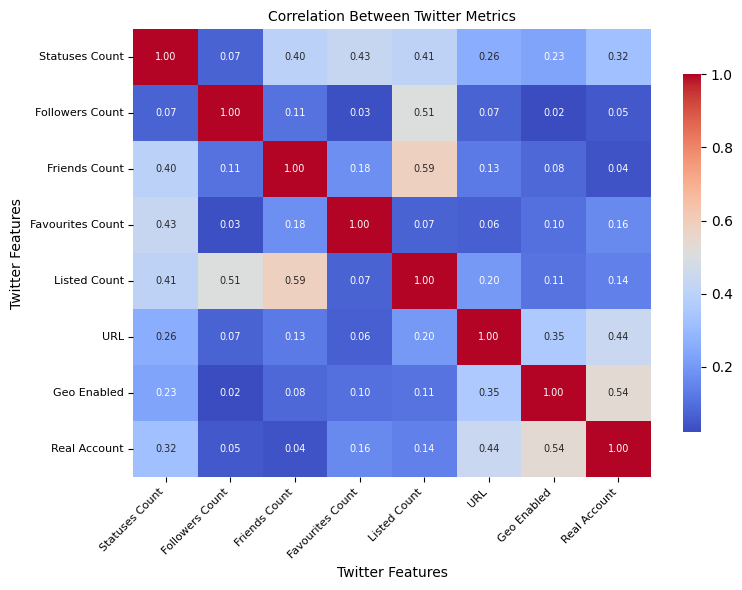

In [66]:
plt.figure(figsize=(8, 6))
axes = sns.heatmap(filtered_users.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 7}, cbar_kws={"shrink": 0.8} )

# Adjust tick labels
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right', fontsize=8)
axes.set_yticklabels(axes.get_yticklabels(), rotation=0, fontsize=8)

# Title and axis labels (optional)
plt.title("Correlation Between Twitter Metrics", fontsize=10)
plt.xlabel("Twitter Features", fontsize=10)
plt.ylabel("Twitter Features", fontsize=10)

plt.tight_layout()
plt.show()

################################################################
###################### Observation #############################
################################################################
# Real acccounts maked as 1 and Fake accounts as 0
# geo_enabled       : Strong positive       : Real accounts are highly likely to have geolocation enabled. Fake users often don't
# url               : Moderate positive     : Real accounts usually provide URLs more often in their profile than Fake accounts
# statuses_count    : Moderate positive     : Real accounts tweets more frequently. Fake ones are more passive.
# favourites_count  : Weak positive         : Real accounts favorite more often than Fake accounts
# listed_count      : Weak positive         : Fake accounts are less recognized and thus appear less in public lists.
# followers_count   : Very weak positive    : Fake accounts barely have any relationship.
# friends_count     : Very weak negative    : Not a strong signal.


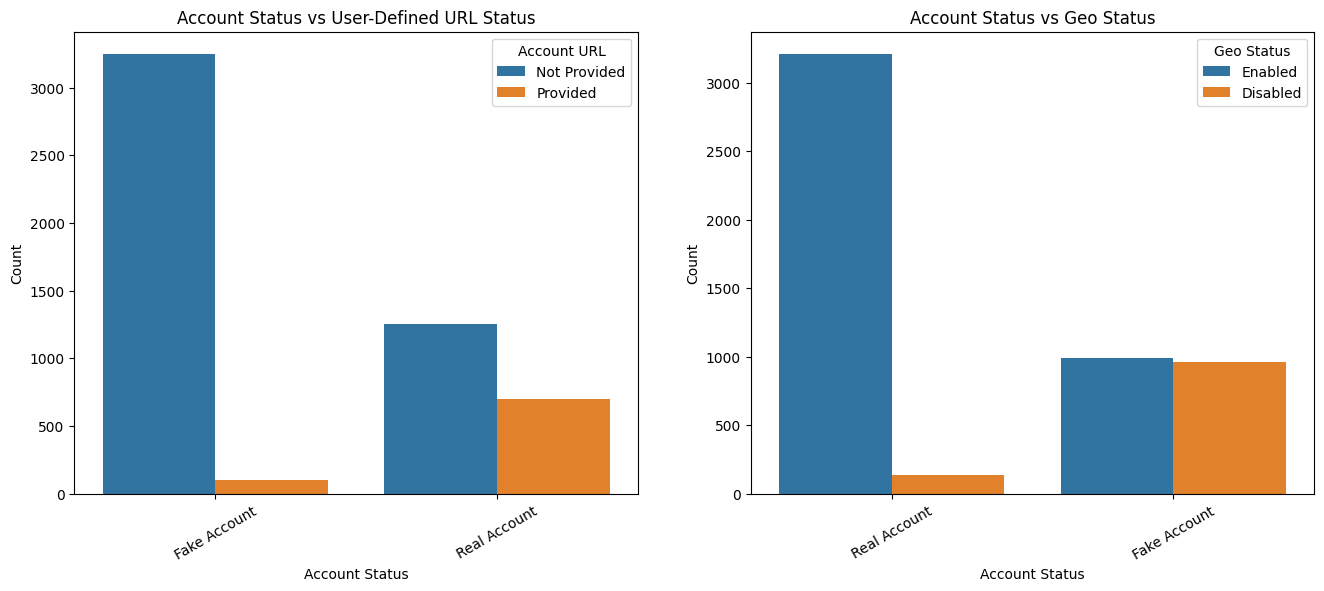

In [67]:
# Count Number of URL mentioned for real vs fake accounts
group_by_url = filtered_users[['URL', 'Geo Enabled', 'Real Account']].groupby(by=['Real Account','URL']).count().reset_index()

# Update data element '1' to 'Real Account' and '0' to 'Fake Account'
group_by_url.loc[group_by_url['Real Account'] == 1, ['Real Account']] = 'Real Account'
group_by_url.loc[group_by_url['Real Account'] == 0, ['Real Account']] = 'Fake Account'

# Update data element '1' to 'URL Provided' and '0' to 'URL not Provided'
group_by_url.loc[group_by_url['URL'] == 1, ['URL']] = 'Provided'
group_by_url.loc[group_by_url['URL'] == 0, ['URL']] = 'Not Provided'

# Rename columns 
group_by_url.rename(columns = {'Geo Enabled':"Count", 'URL': "Account URL", 'Real Account':'Account Status'}, inplace= True)



# Create subpplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=group_by_url, x='Account Status',  y='Count', hue='Account URL' , ax=axes[0])
axes[0].set_title("Account Status vs User-Defined URL Status")
axes[0].tick_params(axis='x',  rotation=30)

# Count Number of geo location enabled for real vs fake accounts
group_by_geo_enabled = filtered_users[['URL', 'Geo Enabled', 'Real Account']].groupby(by=['Real Account','Geo Enabled']).count().reset_index()

# Update data element '1' to 'Real Account' and '0' to 'Fake Account'
group_by_geo_enabled.loc[group_by_geo_enabled['Real Account'] == 0, ['Real Account']] = 'Real Account'
group_by_geo_enabled.loc[group_by_geo_enabled['Real Account'] == 1, ['Real Account']] = 'Fake Account'

# Update data element '1' to 'Geo Enabled' and '0' to 'Geo Not Enabled' 
group_by_geo_enabled['Geo Enabled'] = group_by_geo_enabled['Geo Enabled'].astype('object')
group_by_geo_enabled.loc[group_by_geo_enabled['Geo Enabled'] == 0, ['Geo Enabled']] = 'Enabled'
group_by_geo_enabled.loc[group_by_geo_enabled['Geo Enabled'] == 1, ['Geo Enabled']] = 'Disabled'

# Rename columns
group_by_geo_enabled.rename(columns = {'Geo Enabled':"Geo Status", 'URL': "Count", 'Real Account':'Account Status'}, inplace= True)


sns.barplot(data=group_by_geo_enabled, x='Account Status', y='Count', hue='Geo Status' , ax=axes[1])
axes[1].set_title("Account Status vs Geo Status")
axes[1].tick_params(axis='x', rotation=30)


###############################################################
###################### Observation ############################
###############################################################
# URL        : Optional   : Even though option feature, URLs are missing in large proportionate for fake accounts
#                           in comparision to Real Accounts 
# Geo Status : Optional   : Being privacy, enabling geo status is not mandatory however, real acounts has large number of geo 
#                           enabled 


In [ ]:
# Understand the data distribution and variance (outlier) to avoid skewed data to be part of the analysis
filtered_users.describe()

###############################################################
###################### Observation ############################
###############################################################
# Counts in millions between 75% to 100% quartile

,Statuses Count,Followers Count,Friends Count,Favourites Count,Listed Count,Geo Enabled,Real Account
count,5301.000000,5301.000000,5301.000000,5301.000000,5301.000000,5301.0,5301.000000
mean,1176.738729,245.638559,385.792869,140.934541,2.757782,0.206942,0.367855
std,4488.124804,5879.120913,560.865238,1093.872718,24.845564,0.405152,0.482267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,20.000000,10.000000,196.000000,0.000000,0.000000,0.0,0.000000
50%,39.000000,18.000000,274.000000,0.000000,0.000000,0.0,0.000000
75%,456.000000,60.000000,516.000000,8.000000,0.000000,0.0,1.000000
max,112283.000000,408372.000000,23813.000000,44349.000000,760.000000,1.0,1.000000


In [ ]:
# Outliers in count for 'Statuses' 'Followers' 'Friends' & 'Favourites'
cols = ['Statuses Count', 'Followers Count', 'Friends Count', 'Favourites Count']

# Filter dataframe with quartile 10% to 90% for columns - 'Statuses Count', 'Followers Count', 'Friends Count', 'Favourites Count'
for col in cols:
    q10 = filtered_users[col].quantile(0.1)
    q90 = filtered_users[col].quantile(0.90)
    filtered_users = filtered_users[
        (filtered_users[col] >= q10) & (filtered_users[col] <= q90)
    ]

filtered_users.shape

(2519, 8)

In [108]:
filtered_users

,Statuses Count,Followers Count,Friends Count,Favourites Count,Listed Count,URL,Geo Enabled,Real Account
24,292,57,110,5,0,1,1,1
31,732,85,338,16,3,1,1,1
35,823,43,109,5,1,0,0,1
36,442,79,259,0,3,1,0,1
59,189,35,178,6,0,0,0,1
...,...,...,...,...,...,...,...,...
5272,106,16,505,2,0,0,0,0
5277,18,27,556,0,0,0,0,0
5280,8,10,577,3,0,0,0,0
5281,244,38,518,9,0,0,1,0


In [76]:
filtered_users.describe()

,Statuses Count,Followers Count,Friends Count,Favourites Count,Listed Count,Geo Enabled,Real Account
count,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.0,2519.000000
mean,96.078206,20.676459,292.737197,0.860262,0.100437,0.085748,0.138547
std,242.869192,18.873427,120.800885,2.730903,0.621174,0.280048,0.345542
min,6.000000,7.000000,96.000000,0.000000,0.000000,0.0,0.000000
25%,20.000000,11.000000,208.000000,0.000000,0.000000,0.0,0.000000
50%,26.000000,15.000000,255.000000,0.000000,0.000000,0.0,0.000000
75%,46.000000,21.000000,348.000000,0.000000,0.000000,0.0,0.000000
max,2517.000000,117.000000,589.000000,18.000000,18.000000,1.0,1.000000


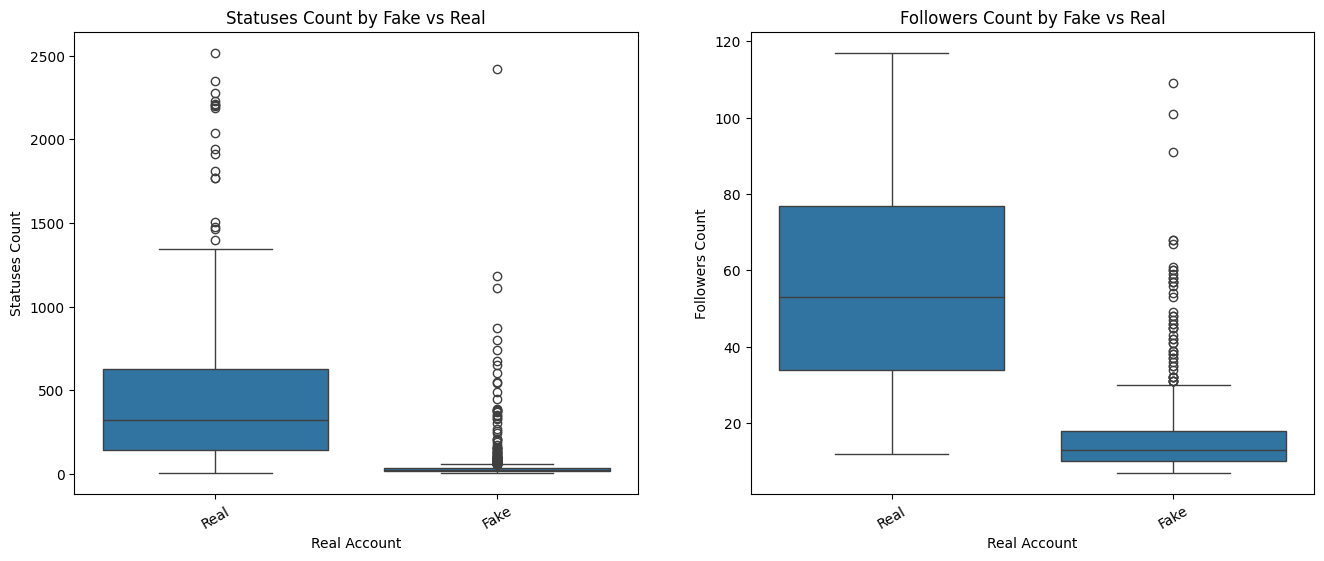

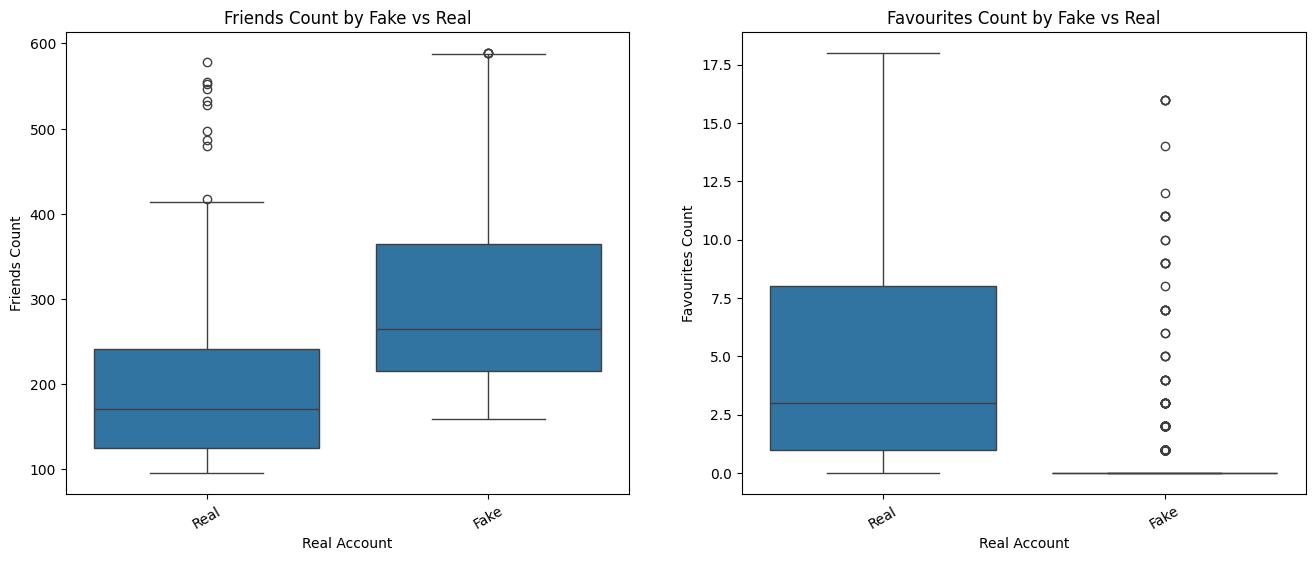

In [110]:
selected_colums_df = filtered_users[['Statuses Count', 'Followers Count', 'Friends Count', 'Favourites Count','Listed Count', 'Real Account']]
selected_colums_df.loc[selected_colums_df['Real Account'] == 1, 'Real Account'] = 'Real'
selected_colums_df.loc[selected_colums_df['Real Account'] == 0, 'Real Account'] = 'Fake'

# Box plot for represent 'Statuses Count'
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=selected_colums_df, x='Real Account', y='Statuses Count', ax=axes[0])
axes[0].set_title("Statuses Count by Fake vs Real")
axes[0].tick_params(axis='x',  rotation=30)

# Box plot for represent 'Followers Count'
sns.boxplot(data=selected_colums_df, x='Real Account', y='Followers Count' , ax=axes[1])
axes[1].set_title("Followers Count by Fake vs Real")
axes[1].tick_params(axis='x',  rotation=30)
plt.show()

# Box plot for represent 'Friends Count'
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=selected_colums_df, x='Real Account', y='Friends Count', ax=axes[0])
axes[0].set_title("Friends Count by Fake vs Real")
axes[0].tick_params(axis='x',  rotation=30)

# Box plot for represent 'Favourites Count'
sns.boxplot(data=selected_colums_df, x='Real Account', y='Favourites Count' , ax=axes[1])
axes[1].set_title("Favourites Count by Fake vs Real")
axes[1].tick_params(axis='x',  rotation=30)
plt.show()

###############################################################
###################### Observation ############################
###############################################################
# Statuses Count :
#   Fake Account : Median status count is very low. Entire IQR near the bottom. Large number of outliers in above 100 and even >2500 statuses
#                  so, most fake accounts are very inactive but few extemely active, possible bots.
#   Real Account : Median is nuch higher, real accounts tweet more on average, IQR spred wider and showing variability.
#                  Outliers exists but are distributed more naturally 
# Follower Count : 
#   Fake Account : Median status count very low and IQR near bottom but large number of outliers
#   Real Account : Natural distribution of follower counts
# Similar pattern for friends count and favourite counts for real and fake accounts

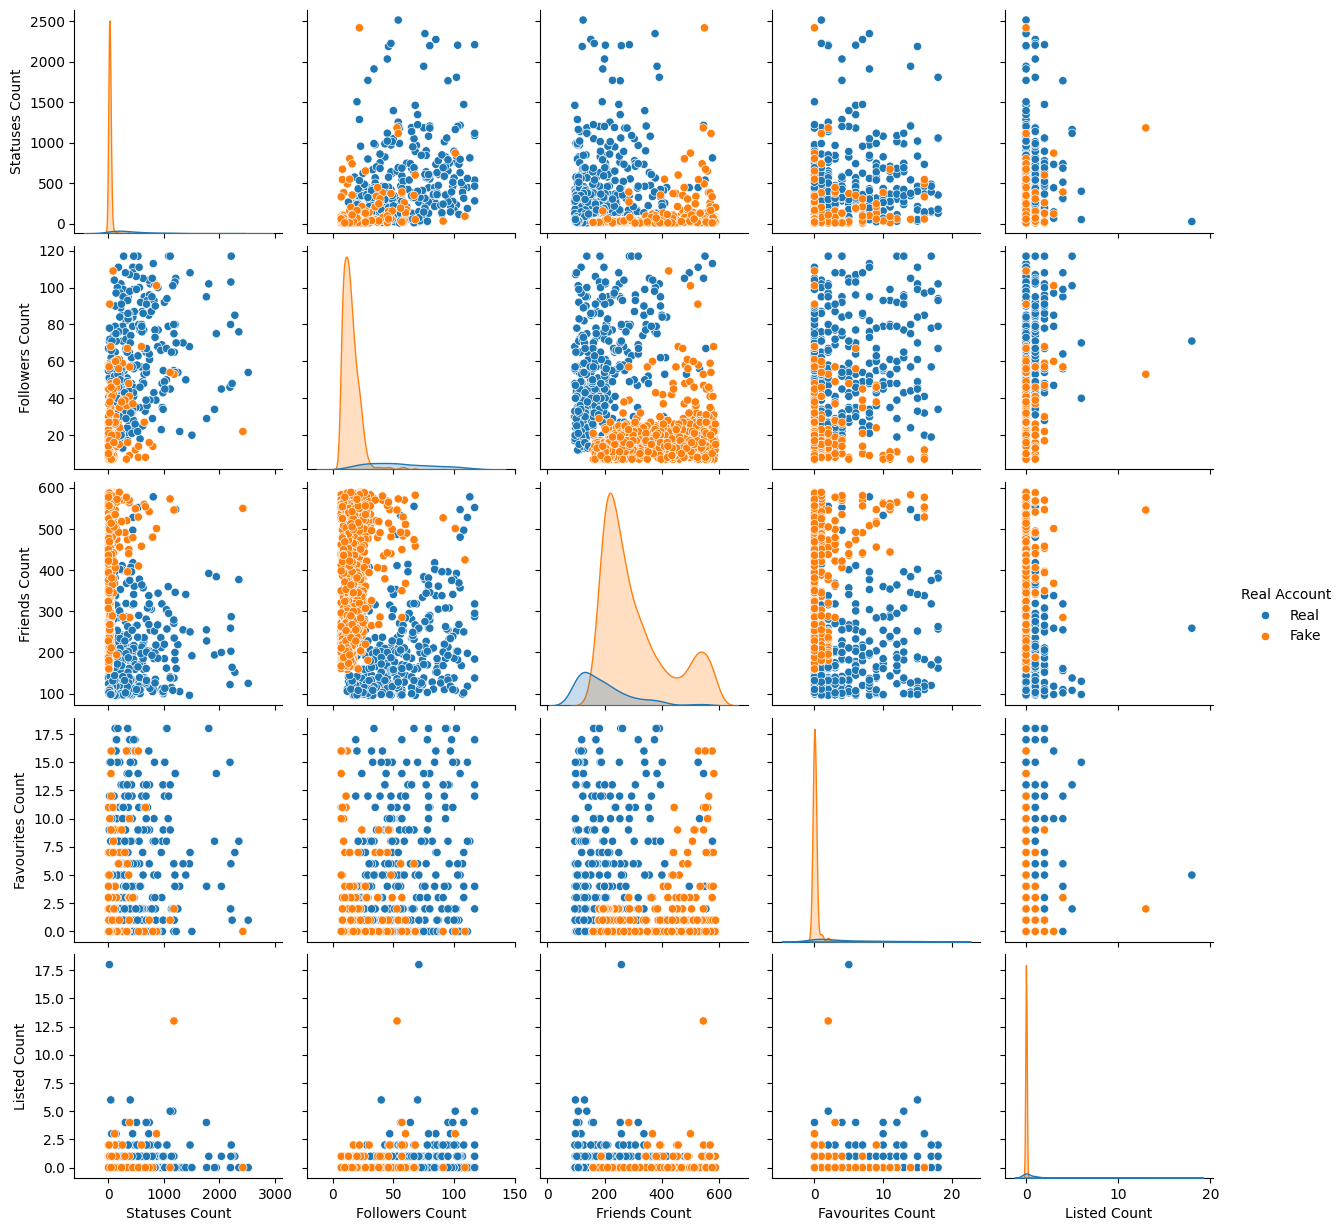

In [ ]:
sns.pairplot(selected_colums_df, hue='Real Account')

###############################################################
###################### Observation ############################
###############################################################
# Fake users relations among various features are concentrated and 
# have similar pattern rather than distributed which give sense of
# abnormality or seems generated based on certain logic 

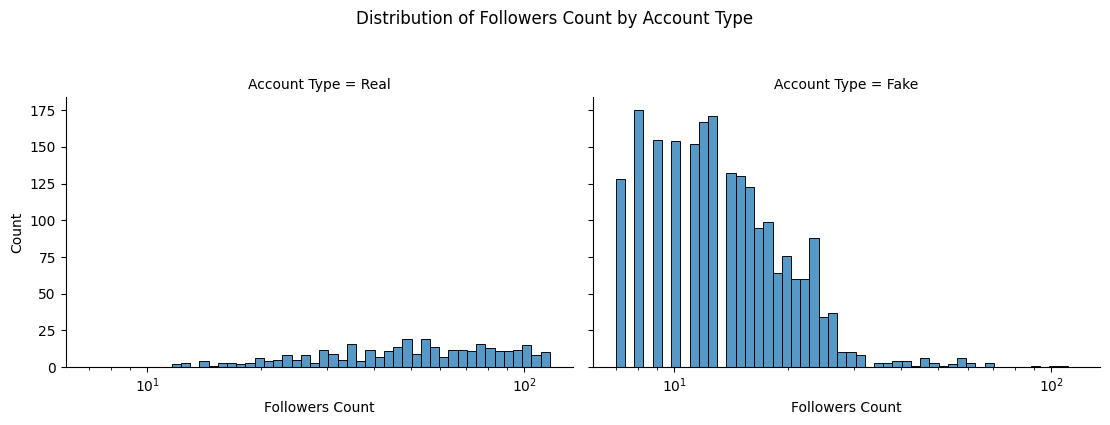

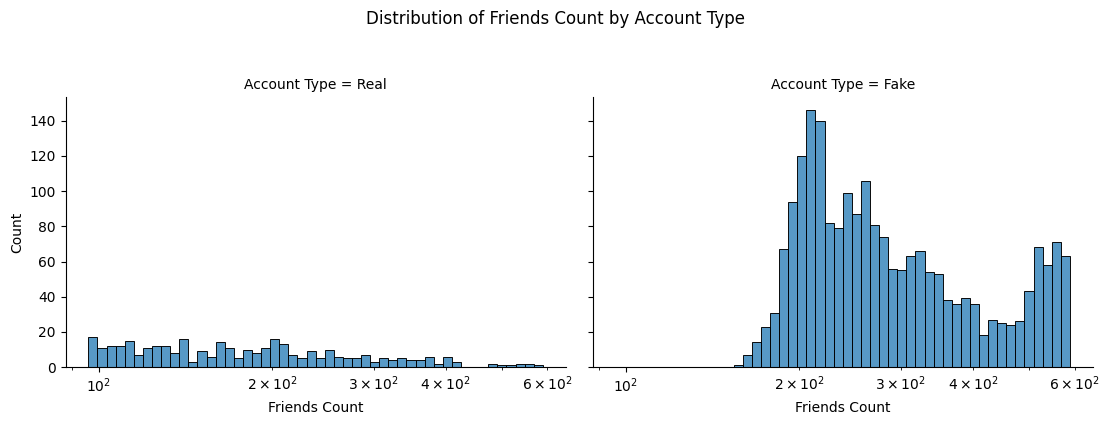

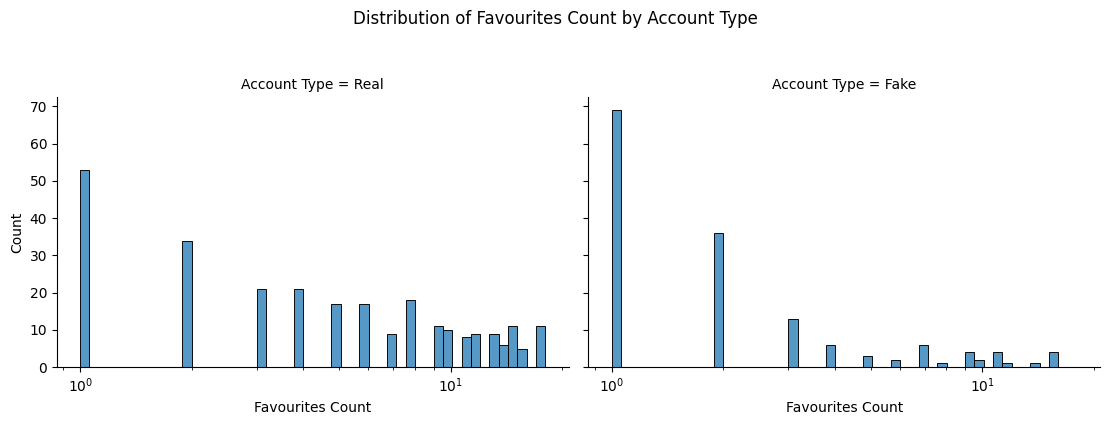

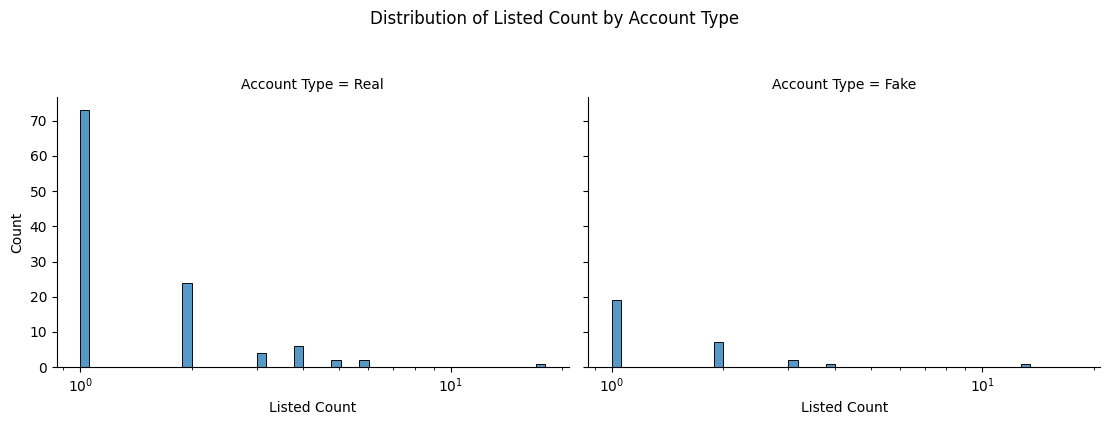

In [ ]:

# Create plot
displot = sns.displot(data=selected_colums_df, x='Followers Count', col='Real Account', log_scale=True, kind='hist', bins=50, height=4,aspect=1.4)
displot.set_axis_labels("Followers Count", "Count")
displot.set_titles("Account Type = {col_name}")
plt.suptitle("Distribution of Followers Count by Account Type", y=1.05)
plt.tight_layout()
plt.show()

displot = sns.displot(data=selected_colums_df, x='Friends Count', col='Real Account', log_scale=True, kind='hist', bins=50, height=4,aspect=1.4)
displot.set_axis_labels("Friends Count", "Count")
displot.set_titles("Account Type = {col_name}")
plt.suptitle("Distribution of Friends Count by Account Type", y=1.05)
plt.tight_layout()
plt.show()

displot = sns.displot(data=selected_colums_df, x='Favourites Count', col='Real Account', log_scale=True, kind='hist', bins=50, height=4,aspect=1.4)
displot.set_axis_labels("Favourites Count", "Count")
displot.set_titles("Account Type = {col_name}")
plt.suptitle("Distribution of Favourites Count by Account Type", y=1.05)
plt.tight_layout()
plt.show()

displot = sns.displot(data=selected_colums_df, x='Listed Count', col='Real Account', log_scale=True, kind='hist', bins=50, height=4,aspect=1.4)
displot.set_axis_labels("Listed Count", "Count")
displot.set_titles("Account Type = {col_name}")
plt.suptitle("Distribution of Listed Count by Account Type", y=1.05)
plt.tight_layout()
plt.show()


###############################################################
###################### Observation ############################
###############################################################
# Distribution plot depict the similar behavious of data which
# is highly concentrated among Fake accounts than real accounts

In [114]:
filtered_users

,Statuses Count,Followers Count,Friends Count,Favourites Count,Listed Count,URL,Geo Enabled,Real Account
24,292,57,110,5,0,1,1,1
31,732,85,338,16,3,1,1,1
35,823,43,109,5,1,0,0,1
36,442,79,259,0,3,1,0,1
59,189,35,178,6,0,0,0,1
...,...,...,...,...,...,...,...,...
5272,106,16,505,2,0,0,0,0
5277,18,27,556,0,0,0,0,0
5280,8,10,577,3,0,0,0,0
5281,244,38,518,9,0,0,1,0


In [119]:
X = filtered_users.drop(columns=['Real Account'], axis= 1)
y = filtered_users['Real Account']

In [120]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)
categorial_columns = ['URL', 'Geo Enabled']
numerical_columns = ['Statuses Count', 'Followers Count', 'Friends Count', 'Favourites Count',	'Listed Count']

### Baseline - Dummy Classfier

In [121]:
# Preprocess with Standard Scaling for all the numeric features
# OneHotEncoding for all the object features
preprocess = ColumnTransformer(
    transformers= [
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorial_columns),
    ]
)

# Fit training data
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('classifier', DummyClassifier(strategy='most_frequent'))
]) 

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred))
print("Baseline F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Baseline Precision Score:", precision_score(y_test, y_pred, average='weighted',zero_division=0))
print("Baseline Recall Score:", recall_score(y_test, y_pred, average='weighted'))


Baseline Accuracy: 0.8650793650793651
Baseline F1 Score: 0.8024991556906451
Baseline Precision Score: 0.7483623078861175
Baseline Recall Score: 0.8650793650793651


### Baseline - Logistic Regression

In [122]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('lr', LogisticRegression())
]) 

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Baseline Accuracy:" , accuracy_score(y_test, y_pred))

Baseline Accuracy: 0.9857142857142858


### Default Parameters - KNN, Logistic Regression, Space Vector Classfier, Decision Tree Classifier

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define the models and their hypermeters (default)
models = {
    'knn': (KNeighborsClassifier(), {}),
    'logisticregression' : (LogisticRegression(), {}),
    'svc': (SVC(), {}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {})
}

results = []
best_model_result = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocess),
        (name, model)
    ])
    
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    y_pred = grid_search.best_estimator_.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    
    # Append the results
    results.append([name, train_score, test_score, fit_time, accuracy, precision, recall, f1score])
    best_model_result.append([name, ])

# Create the results DataFrame
results_df_before = pd.DataFrame(results, columns=['Model', 'Train score', 'Test score', 'Train time', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
results_df_before.set_index('Model', inplace=True)

In [124]:
results_df_before


,Train score,Test score,Train time,Accuracy,Precision,Recall,F1-score
Model,,,,,,,
knn,0.989942,0.988889,14.348690,0.988889,0.987500,0.929412,0.957576
logisticregression,0.989412,0.985714,0.998861,0.985714,0.963415,0.929412,0.946108
svc,0.994706,0.988889,0.069812,0.988889,0.964286,0.952941,0.958580
decisiontreeclassifier,1.000000,0.988889,1.153847,0.988889,0.953488,0.964706,0.959064


### Best Parameters - KNN, Logistic Regression, Space Vector Classfier, Decision Tree Classifier

In [ ]:
# Define the models and hyperparameters
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=10000), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [5, 10, 15]})
}

results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        (name, model) 
    ])
    
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
    y_pred1 = grid_search.best_estimator_.predict(X_test)
    cm = confusion_matrix(y_test, y_pred1)

    accuracy = accuracy_score(y_test, y_pred1)
    precision = precision_score(y_test, y_pred1)
    recall = recall_score(y_test, y_pred1)
    f1score = f1_score(y_test, y_pred1)
    
    # Append the results
    results.append([name, train_score, test_score, fit_time, accuracy, precision, recall, f1score])

# Create the results DataFrame
results_df_after = pd.DataFrame(results, columns=['Model', 'Train Score', 'Test Score', 'Average Fit Time', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df_after.set_index('Model', inplace=True)

In [126]:
results_df_after

,Train Score,Test Score,Average Fit Time,Accuracy,Precision,Recall,F1-Score
Model,,,,,,,
knn,0.991530,0.990476,0.099001,0.990476,0.964706,0.964706,0.964706
logisticregression,0.991530,0.990476,0.424832,0.990476,0.975904,0.952941,0.964286
svc,0.990471,0.992063,0.876690,0.992063,0.976190,0.964706,0.970414
decisiontreeclassifier,0.998412,0.982540,0.037921,0.982540,0.951220,0.917647,0.934132


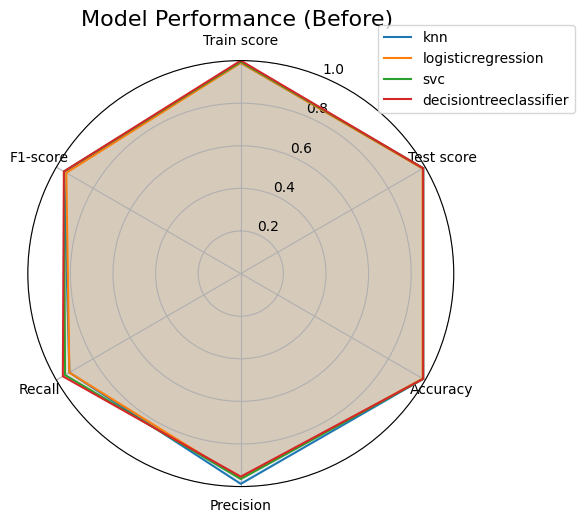

In [131]:
df = results_df_before[["Train score", "Test score", "Accuracy","Precision", "Recall", "F1-score"]]
# Metrics to plot
metrics = df.columns.tolist()
num_vars = len(metrics)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the circle

# Create plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each model
for model in df.index:
    values = df.loc[model].tolist()
    values += values[:1]  # close the circle
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

# Add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), metrics)

# Title and legend
plt.title("Model Performance (Before) ", size=16)
ax.set_ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

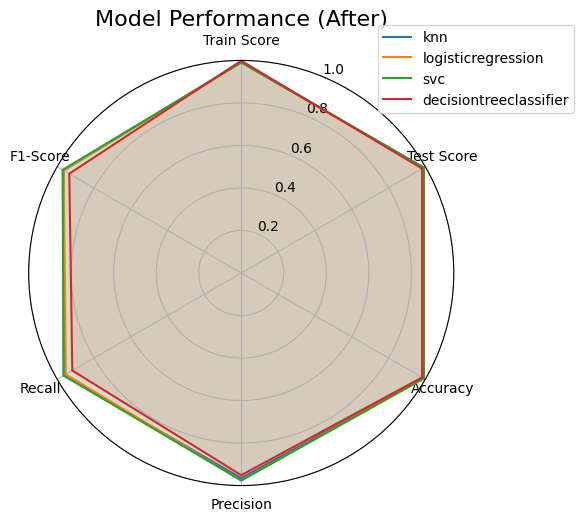

In [128]:
df = results_df_after[["Train Score", "Test Score",	"Accuracy",	"Precision", "Recall", "F1-Score"]]
# Metrics to plot
metrics = df.columns.tolist()
num_vars = len(metrics)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the circle

# Create plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each model
for model in df.index:
    values = df.loc[model].tolist()
    values += values[:1]  # close the circle
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

# Add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), metrics)

# Title and legend
plt.title("Model Performance (After)", size=16)
ax.set_ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()